In [37]:
from os import path
import requests
from requests.auth import HTTPBasicAuth
import pandas as pd

import numpy as np

from datetime import datetime, timezone
from dateutil import tz
import pytz

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

In [60]:
df = pd.read_csv("wattime_data.csv")
df["date"] = pd.to_datetime(df.point_time)
df["date_PT"] = pd.DatetimeIndex(df['date']).tz_convert("America/Los_Angeles")
df["time"] = pd.DatetimeIndex(df['date_PT']).time
df["year"] = [d.year for d in df["date_PT"]]
df["month"] = [d.month for d in df["date"]]
df["day_of_month"] = pd.DatetimeIndex(df['date_PT']).day
df["day_of_week"] = [datetime.weekday(d) for d in df["date_PT"]]
df["day_of_week"] = df["day_of_week"].replace({0 : "Mon", 1 : "Tue", 2 : "Wed", 3 : "Thu", 4 : "Fri", 5 : "Sat", 6 : "Sun"})
df["hour"] = [d.hour for d in df["time"]]
df["minute"] = [d.hour * 60 + d.minute for d in df["time"]]
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("point_time", axis=1)
df = df.rename(columns = {"value" : "MOER"})
df

,MOER,frequency,market,ba,datatype,version,date,date_PT,time,year,month,day_of_month,day_of_week,hour,minute
0,1022.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:00:00+00:00,2017-12-31 16:00:00-08:00,16:00:00,2017,1,31,Sun,16,960
1,1022.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:05:00+00:00,2017-12-31 16:05:00-08:00,16:05:00,2017,1,31,Sun,16,965
2,1021.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:10:00+00:00,2017-12-31 16:10:00-08:00,16:10:00,2017,1,31,Sun,16,970
3,1021.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:15:00+00:00,2017-12-31 16:15:00-08:00,16:15:00,2017,1,31,Sun,16,975
4,1021.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:20:00+00:00,2017-12-31 16:20:00-08:00,16:20:00,2017,1,31,Sun,16,980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499187,920.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 02:10:00+00:00,2022-09-29 19:10:00-07:00,19:10:00,2022,9,29,Thu,19,1150
499188,918.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 02:15:00+00:00,2022-09-29 19:15:00-07:00,19:15:00,2022,9,29,Thu,19,1155
499189,918.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 02:20:00+00:00,2022-09-29 19:20:00-07:00,19:20:00,2022,9,29,Thu,19,1160
499190,917.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 02:25:00+00:00,2022-09-29 19:25:00-07:00,19:25:00,2022,9,29,Thu,19,1165


## List of Highest MOERs

In [61]:
df.sort_values(by="MOER", ascending=False).head(20)

,MOER,frequency,market,ba,datatype,version,date,date_PT,time,year,month,day_of_month,day_of_week,hour,minute
433489,1358.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-02-13 23:55:00+00:00,2022-02-13 15:55:00-08:00,15:55:00,2022,2,13,Sun,15,955
433488,1350.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-02-13 23:50:00+00:00,2022-02-13 15:50:00-08:00,15:50:00,2022,2,13,Sun,15,950
433487,1335.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-02-13 23:45:00+00:00,2022-02-13 15:45:00-08:00,15:45:00,2022,2,13,Sun,15,945
308483,1283.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-06 23:55:00+00:00,2020-12-06 15:55:00-08:00,15:55:00,2020,12,6,Sun,15,955
310494,1280.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:30:00+00:00,2020-12-13 15:30:00-08:00,15:30:00,2020,12,13,Sun,15,930
310496,1280.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:40:00+00:00,2020-12-13 15:40:00-08:00,15:40:00,2020,12,13,Sun,15,940
310491,1278.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:15:00+00:00,2020-12-13 15:15:00-08:00,15:15:00,2020,12,13,Sun,15,915
310493,1278.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:25:00+00:00,2020-12-13 15:25:00-08:00,15:25:00,2020,12,13,Sun,15,925
310495,1275.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:35:00+00:00,2020-12-13 15:35:00-08:00,15:35:00,2020,12,13,Sun,15,935
310500,1273.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-14 00:00:00+00:00,2020-12-13 16:00:00-08:00,16:00:00,2020,12,13,Sun,16,960


## List of Lowest MOERS

In [62]:
df.sort_values(by="MOER").head(20)

,MOER,frequency,market,ba,datatype,version,date,date_PT,time,year,month,day_of_month,day_of_week,hour,minute
262009,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:35:00+00:00,2020-06-28 08:35:00-07:00,08:35:00,2020,6,28,Sun,8,515
262011,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:45:00+00:00,2020-06-28 08:45:00-07:00,08:45:00,2020,6,28,Sun,8,525
262010,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:40:00+00:00,2020-06-28 08:40:00-07:00,08:40:00,2020,6,28,Sun,8,520
262291,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-29 15:05:00+00:00,2020-06-29 08:05:00-07:00,08:05:00,2020,6,29,Mon,8,485
262008,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:30:00+00:00,2020-06-28 08:30:00-07:00,08:30:00,2020,6,28,Sun,8,510
262007,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:25:00+00:00,2020-06-28 08:25:00-07:00,08:25:00,2020,6,28,Sun,8,505
262006,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:20:00+00:00,2020-06-28 08:20:00-07:00,08:20:00,2020,6,28,Sun,8,500
262589,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-30 15:55:00+00:00,2020-06-30 08:55:00-07:00,08:55:00,2020,6,30,Tue,8,535
262012,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:50:00+00:00,2020-06-28 08:50:00-07:00,08:50:00,2020,6,28,Sun,8,530
262005,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:15:00+00:00,2020-06-28 08:15:00-07:00,08:15:00,2020,6,28,Sun,8,495


## Looking at the distribution of MOER Values
- Large number of very low MOERs.
    - One thing we could do is to look at a dataset of just the very low MOERs and look and the conditions for then this occurs.
    
- Aside from this, there is a symmetrical distribution of MOER's with mu=950ish.

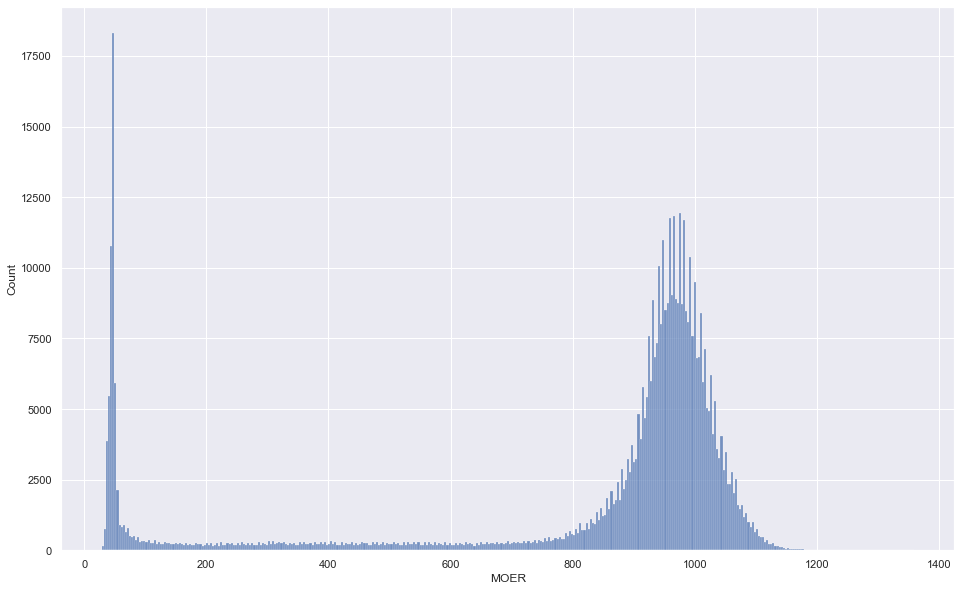

In [63]:
sns.set(rc={'figure.figsize':(16, 10)});
sns.histplot(data=df, x="MOER");

## Looking at MOERs by Day of Week
- Noticable drop during the weekends. 
- Monday and Friday are the lowest weekdays, which also makes sense (3-day weekends)

In [64]:
by_dow = df[["day_of_week", "MOER"]].groupby("day_of_week").mean()
by_dow = by_dow.reindex(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
by_dow

,MOER
day_of_week,
Mon,827.732295
Tue,835.494358
Wed,834.459318
Thu,834.194287
Fri,826.213971
Sat,780.411397
Sun,765.392963


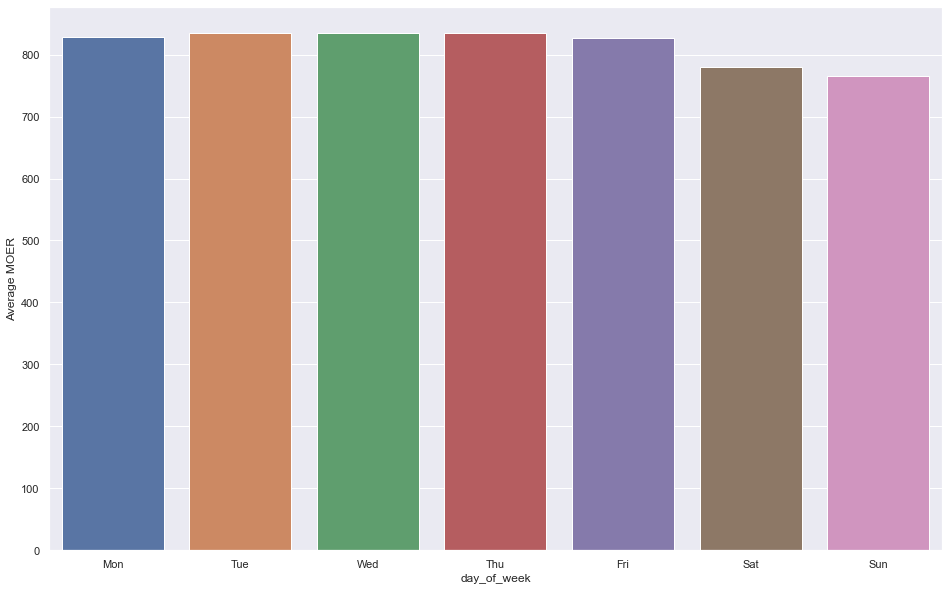

In [65]:
sns.barplot(data=by_dow, x=by_dow.index, y="MOER")
plt.ylabel("Average MOER");

## Looking at Scatterplot of MOERs by Hour
- Pretty hard to tell what's going on here. But there seems to be lower MOERs in hours 6-18 (daylight).

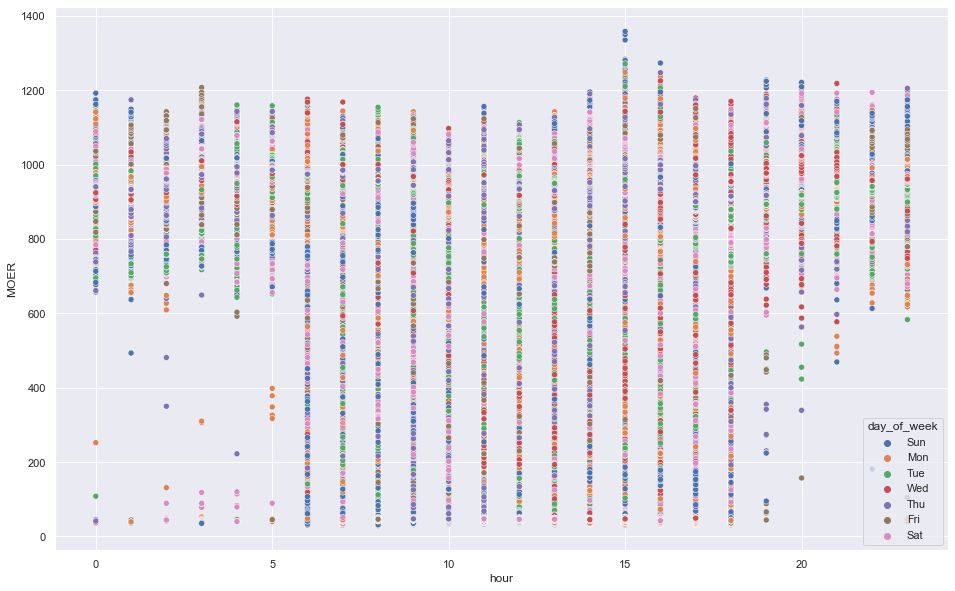

In [68]:
sns.scatterplot(data=df, x="hour", y="MOER", hue="day_of_week");

## Looking at MOER plots of the week of 1/11/21 (Monday) to 1/17/21 (Sunday):

Highest MOER: 1/12. Overcast. https://weatherspark.com/h/d/491/2021/1/12/Historical-Weather-on-Tuesday-January-12-2021-in-Berkeley-California-United-States#Figures-PrecipitationProbability

Lowest MOER: 1/17. Clear https://weatherspark.com/h/d/491/2021/1/17/Historical-Weather-on-Sunday-January-17-2021-in-Berkeley-California-United-States#Figures-CloudCover

This supports the hypothesis that weather is a predictor of MOER.

This data is smoothed for readability so that shadows represent a smoothed estimate for each hour.

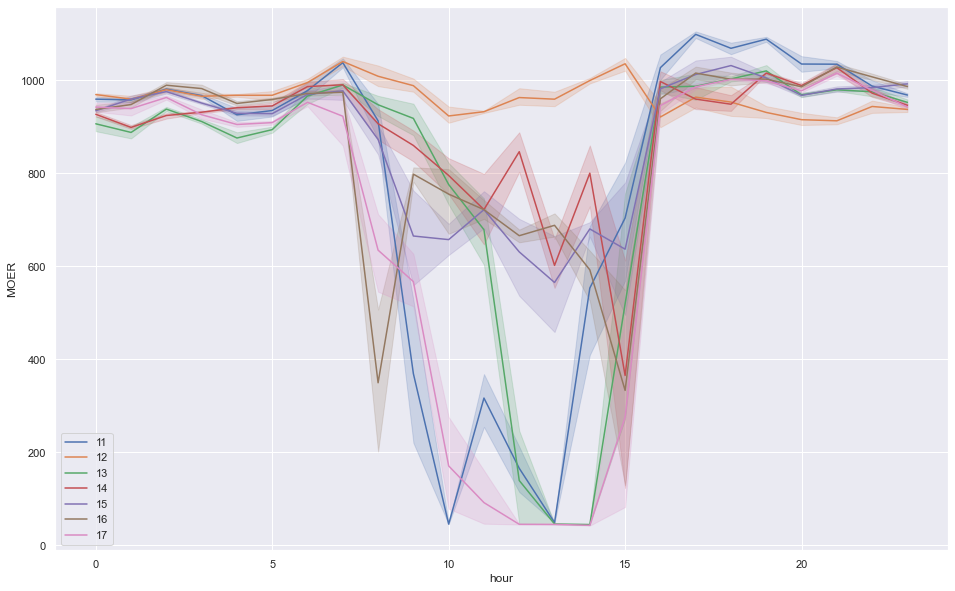

In [70]:
sns.set(rc={'figure.figsize':(16, 10)});
jan_21 = df[(df["year"] == 2021) & (df["month"] == 1)]
for i in range(11, 18):
    to_graph = jan_21[jan_21["day_of_month"] == i][["hour", "MOER"]].groupby("hour").mean()
    sns.lineplot(data = jan_21[jan_21["day_of_month"] == i], x="hour", y="MOER", label=i)

## Looking at CO2 rates by Month
* Hypothesis: months with the most moderate weather (Apr-Jun) have lowest MOER because residences don't need much heating or cooling. In peak summer and peak winter months MOERs are higher.

In [71]:
by_month = df[["month", "MOER"]].groupby("month").mean()
by_month

,MOER
month,
1,903.519453
2,842.991234
3,812.467040
4,689.094850
5,593.806518
6,696.708275
7,800.492328
8,871.368418
9,862.341157


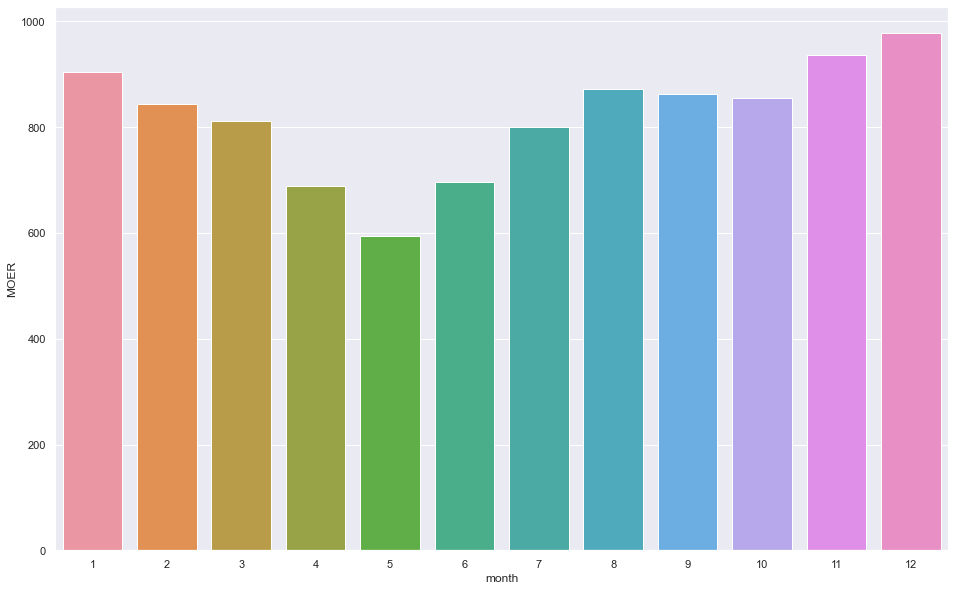

In [72]:
sns.barplot(data = by_month, x=by_month.index, y="MOER");

## Looking at most polluting hours of the week.
- Lowest average MOER: Sunday between 9am-1pm. Second place is Saturday around the same time. Lots of direct sunlight but people aren't working.
- Hghest average MOER: 4pm-5pm, every day of the week.

In [76]:
df_hourly = df[df["minute"] % 60 == 0]
df_hourly

,MOER,frequency,market,ba,datatype,version,date,date_PT,time,year,month,day_of_month,day_of_week,hour,minute
0,1022.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:00:00+00:00,2017-12-31 16:00:00-08:00,16:00:00,2017,1,31,Sun,16,960
12,1007.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 01:00:00+00:00,2017-12-31 17:00:00-08:00,17:00:00,2017,1,31,Sun,17,1020
24,1039.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 02:00:00+00:00,2017-12-31 18:00:00-08:00,18:00:00,2017,1,31,Sun,18,1080
36,1021.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 03:00:00+00:00,2017-12-31 19:00:00-08:00,19:00:00,2017,1,31,Sun,19,1140
48,966.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 04:00:00+00:00,2017-12-31 20:00:00-08:00,20:00:00,2017,1,31,Sun,20,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499137,943.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 22:00:00+00:00,2022-09-29 15:00:00-07:00,15:00:00,2022,9,29,Thu,15,900
499149,986.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 23:00:00+00:00,2022-09-29 16:00:00-07:00,16:00:00,2022,9,29,Thu,16,960
499161,997.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 00:00:00+00:00,2022-09-29 17:00:00-07:00,17:00:00,2022,9,29,Thu,17,1020
499173,900.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-30 01:00:00+00:00,2022-09-29 18:00:00-07:00,18:00:00,2022,9,29,Thu,18,1080


In [77]:
by_hour_of_week = df_hourly.groupby(["hour", "day_of_week"])[["MOER"]].mean()
by_hour_of_week.sort_values("MOER").head(20)

,,MOER
hour,day_of_week,
11,Sun,422.234818
10,Sun,424.174089
9,Sun,434.550607
12,Sun,441.983806
13,Sun,442.781377
11,Sat,459.473684
12,Sat,464.931174
13,Sat,471.105263
14,Sun,475.141700


In [78]:
by_hour_of_week.sort_values("MOER", ascending=True).sort_values("MOER", ascending=False).head(20)

MOER
hour day_of_week            
4    Wed          987.250000
5    Sun          985.975709
     Thu          984.133065
     Sat          983.611336
4    Thu          982.298387
     Tue          982.052419
5    Wed          981.629032
4    Sun          981.578947
5    Tue          981.084677
     Mon          980.887097
4    Fri          978.457490
     Mon          978.455645
5    Fri          976.595142
3    Tue          976.318548
     Sun          974.627530
4    Sat          973.477733
3    Thu          972.387097
     Fri          972.117409
21   Tue          971.495968
20   Mon          971.028226

## Looking at the best/worst months in the past 5 years.
-Worst month was December 2019. Winter 2018-219 and Winter 2019-2020 are the worst.

-Hypothesis: coldest and wettest weather in the last 5 years. Check out the chart here (https://ggweather.com/enso/oni.htm) that has a graph of El Nino vs. La Nina weather patterns in the past 5 years. 

In [80]:
by_month_and_year = df_hourly.groupby(["month", "year"])[["MOER"]].mean()
by_month_and_year.sort_values("MOER", ascending=False).head(20)

MOER
month year             
12    2019  1021.806711
1     2017  1017.500000
11    2019   984.828017
12    2018   983.421477
      2021   960.836242
11    2018   955.880721
12    2020   945.920805
1     2019   938.763758
      2020   936.629530
2     2019   925.332838
10    2020   923.504698
11    2021   922.520111
1     2018   922.012081
9     2021   906.386963
8     2022   905.697987
      2018   904.562416
9     2022   887.617143
7     2021   885.684564
11    2020   882.517337
8     2021   874.514094

In [81]:
by_month_and_year.sort_values("MOER").head(20)

MOER
month year            
5     2020  537.551678
      2019  555.118121
      2022  570.586577
      2018  574.750336
6     2020  595.629681
      2019  599.471567
4     2018  605.595007
7     2020  642.263087
6     2018  645.074896
4     2019  647.196949
      2020  655.431345
      2022  700.294036
5     2021  705.084564
6     2022  731.427184
2     2021  749.132244
7     2019  770.761074
3     2018  780.573154
      2020  782.883221
8     2020  785.326174
3     2019  808.483221

## Have MOERs fallen in the past 5 years?
- Answer: not discernably. 
- Hypothesis: since MOER is a marginal quantity, even if CA built more solar panels in the last 5 years, it may not affect the cost of producing 1 additional kWH.

In [82]:
by_year = df_hourly.groupby("year")[["MOER"]].mean()
by_year = by_year.sort_values("year", ascending=False).head(20)

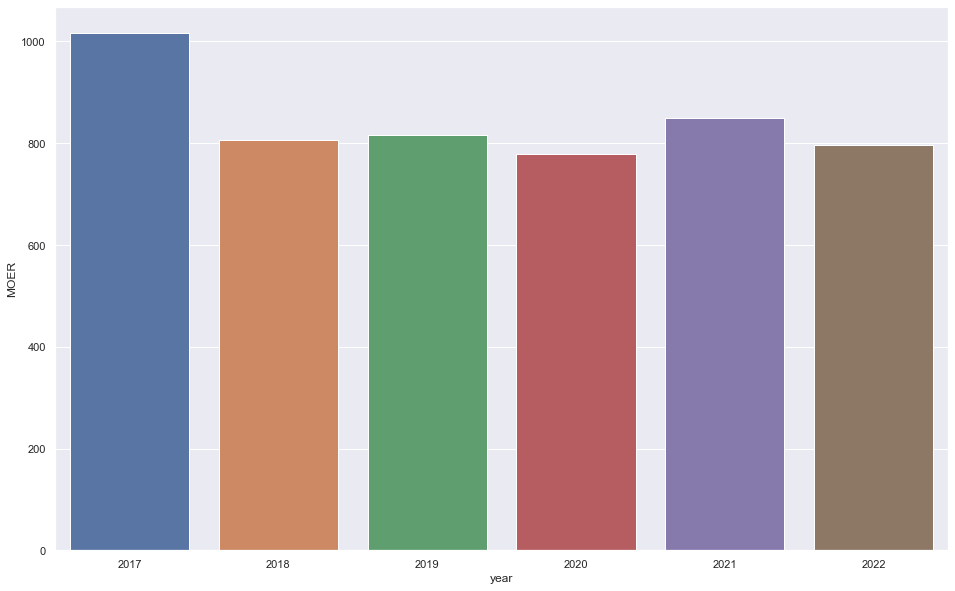

In [83]:
sns.barplot(data=by_year, x=by_year.index, y="MOER");

## Analysis of Times when the MOER is very low
* Low MOER readings are concentrated in March-June
* Low MOER readings often happen on the weekends from mid-morning to early afternoon.

In [84]:
low_moers = df[df["MOER"] < 100]
low_moers

,MOER,frequency,market,ba,datatype,version,date,date_PT,time,year,month,day_of_month,day_of_week,hour,minute
1357,47.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-05 17:00:00+00:00,2018-01-05 09:00:00-08:00,09:00:00,2018,1,5,Fri,9,540
1358,88.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-05 17:05:00+00:00,2018-01-05 09:05:00-08:00,09:05:00,2018,1,5,Fri,9,545
1359,74.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-05 17:10:00+00:00,2018-01-05 09:10:00-08:00,09:10:00,2018,1,5,Fri,9,550
1363,88.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-05 17:30:00+00:00,2018-01-05 09:30:00-08:00,09:30:00,2018,1,5,Fri,9,570
1364,88.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-05 17:35:00+00:00,2018-01-05 09:35:00-08:00,09:35:00,2018,1,5,Fri,9,575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499070,47.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 16:25:00+00:00,2022-09-29 09:25:00-07:00,09:25:00,2022,9,29,Thu,9,565
499079,47.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 17:10:00+00:00,2022-09-29 10:10:00-07:00,10:10:00,2022,9,29,Thu,10,610
499080,47.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 17:15:00+00:00,2022-09-29 10:15:00-07:00,10:15:00,2022,9,29,Thu,10,615
499081,61.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 17:20:00+00:00,2022-09-29 10:20:00-07:00,10:20:00,2022,9,29,Thu,10,620


In [85]:
count_low_moers_by_month = low_moers.groupby("month")[["time"]].count().rename(columns={"time" : "count"})
count_low_moers_by_month

,count
month,
1,2132
2,4209
3,5610
4,9924
5,12453
6,7192
7,3810
8,1854
9,2461


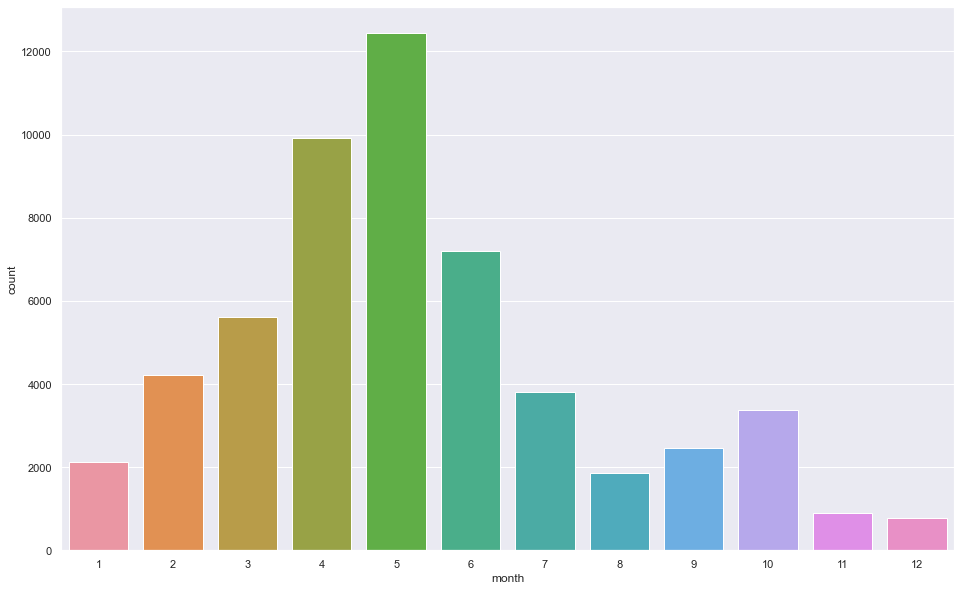

In [86]:
sns.barplot(data=count_low_moers_by_month, x=count_low_moers_by_month.index, y="count");

In [87]:
low_moers_hourly = low_moers[low_moers["minute"] % 60 == 0]
low_moers_by_hour_of_week = low_moers_hourly.groupby(["hour", "day_of_week"])[["time"]].count().rename(columns={"time" : "count"})
low_moers_by_hour_of_week.sort_values("count", ascending=False).head(20)

,,count
hour,day_of_week,
10,Sun,115
11,Sun,114
12,Sun,112
13,Sun,111
9,Sun,106
14,Sun,105
12,Sat,104
11,Sat,102
13,Sat,100
